In [18]:
# Prolog - Auto Generated #
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from datetime import datetime
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import autocorrelation_plot

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from pandas.plotting import lag_plot
import pandas_datareader as dr
import matplotlib.dates as mdates
import seaborn as sns
from pandas.tseries.offsets import DateOffset

In [2]:
start=datetime(2012,1,1)
end=datetime(2019,4,1)

In [3]:
tesla = dr.data.get_data_yahoo('TSLA', start=start, end=end)
dataset=tesla

dataset.set_index = pd.to_datetime(dataset.index)
dataset["Gain"] = dataset['Close'] - dataset['Close'].shift(1)
dataset["ema_12"] = dataset['Close'].ewm(span=12, adjust=False).mean()
dataset["ema_26"] = dataset['Close'].ewm(span=26, adjust=False).mean()
dataset["sma_20"] = dataset['Close'].rolling(window=20).mean()
dataset["sma_50"] = dataset['Close'].rolling(window=50).mean()
dataset["sma_100"] = dataset['Close'].rolling(window=100).mean()
print(dataset.tail())

                  High         Low        Open       Close   Volume  \
Date                                                                  
2019-03-27  275.369995  268.179993  268.750000  274.829987  8779200   
2019-03-28  280.329987  275.100006  277.160004  278.619995  6774100   
2019-03-29  280.160004  274.500000  278.700012  279.859985  5991300   
2019-04-01  289.200012  281.279999  282.619995  289.179993  8110400   
2019-04-02  289.440002  283.880005  288.299988  285.880005  5478900   

             Adj Close      Gain      ema_12      ema_26      sma_20  \
Date                                                                   
2019-03-27  274.829987  7.059998  273.837117  282.881904  279.714998   
2019-03-28  278.619995  3.790009  274.572945  282.566207  277.651997   
2019-03-29  279.859985  1.239990  275.386336  282.365746  276.905496   
2019-04-01  289.179993  9.320007  277.508437  282.870505  277.096497   
2019-04-02  285.880005 -3.299988  278.796370  283.093431  277.563496  

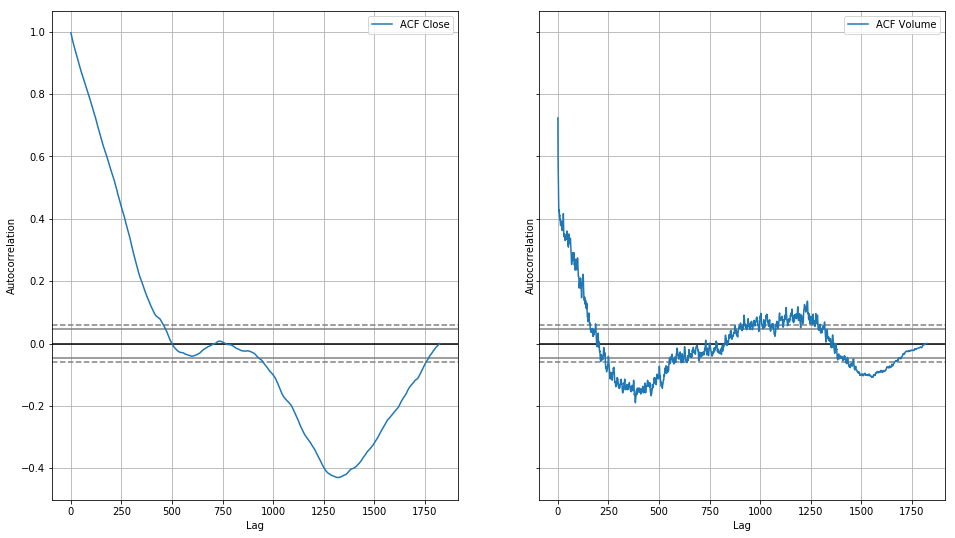

No handles with labels found to put in legend.


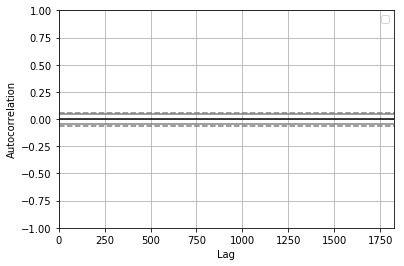

,High,Low,Open,Close,Volume,Adj Close,Gain,ema_12,ema_26,sma_20,sma_50,sma_100
Date,,,,,,,,,,,,
2019-03-27,275.369995,268.179993,268.750000,274.829987,8779200,274.829987,7.059998,273.837117,282.881904,279.714998,296.919999,319.194400
2019-03-28,280.329987,275.100006,277.160004,278.619995,6774100,278.619995,3.790009,274.572945,282.566207,277.651997,295.603799,318.607400
2019-03-29,280.160004,274.500000,278.700012,279.859985,5991300,279.859985,1.239990,275.386336,282.365746,276.905496,294.279999,317.963199
2019-04-01,289.200012,281.279999,282.619995,289.179993,8110400,289.179993,9.320007,277.508437,282.870505,277.096497,293.117399,317.390899
2019-04-02,289.440002,283.880005,288.299988,285.880005,5478900,285.880005,-3.299988,278.796370,283.093431,277.563496,292.789799,316.835699


In [4]:

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
 
#series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


fig, axs = plt.subplots(1,2,figsize=(16,9), sharey=True)
fig = autocorrelation_plot(dataset["Close"], ax = axs[0], label='ACF Close')
fig = autocorrelation_plot(dataset["Volume"], ax = axs[1], label='ACF Volume')

plt.legend()
plt.show()

fig = autocorrelation_plot(dataset["Gain"])

plt.legend()
plt.show()

dataset.head()
dataset.tail()


In [5]:
print(np.corrcoef(dataset["Volume"], dataset["ema_12"]))
print(np.corrcoef(dataset["Gain"], dataset["Volume"]))
print(np.corrcoef(dataset["Open"], dataset["ema_12"]))

[[1.         0.31979097]
 [0.31979097 1.        ]]
[[nan nan]
 [nan  1.]]
[[1.         0.99593423]
 [0.99593423 1.        ]]


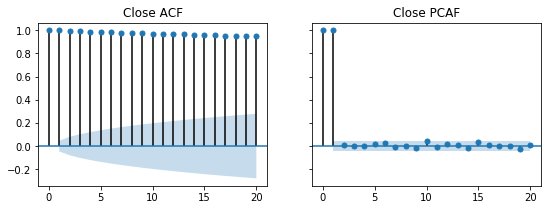

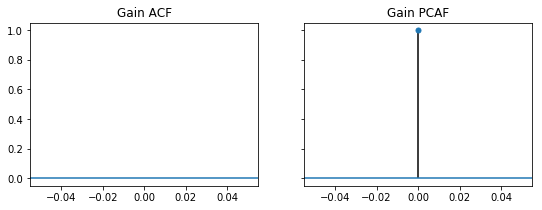

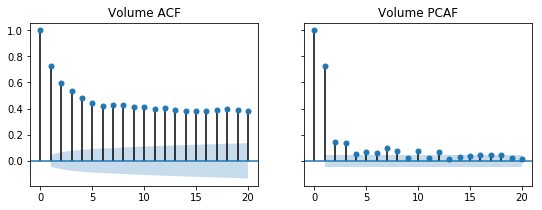

In [6]:


new_dataset = dataset

for col in ['Close', 'Gain', 'Volume']:
    #print(new_dataset[col].head())
    fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey=True)
    fig = plot_acf(new_dataset[col], lags=20, title=col + " ACF", ax = axs[0])
    fig = plot_pacf(new_dataset[col], lags=20, title=col + " PCAF", ax = axs[1])
    #fig.suptitle('')
plt.show()


#Are we using Auto-Regressive (AR), or Moving Average (MA) in our ARIMA model
#Gradual Decline suggests MA and Sharp Drop-Off suggests AR

#ACF


#PACF 
#Conditional corellation
#corellation of 2 variables in consideration of the relationship between the dependent, and independent variables with other independent variables

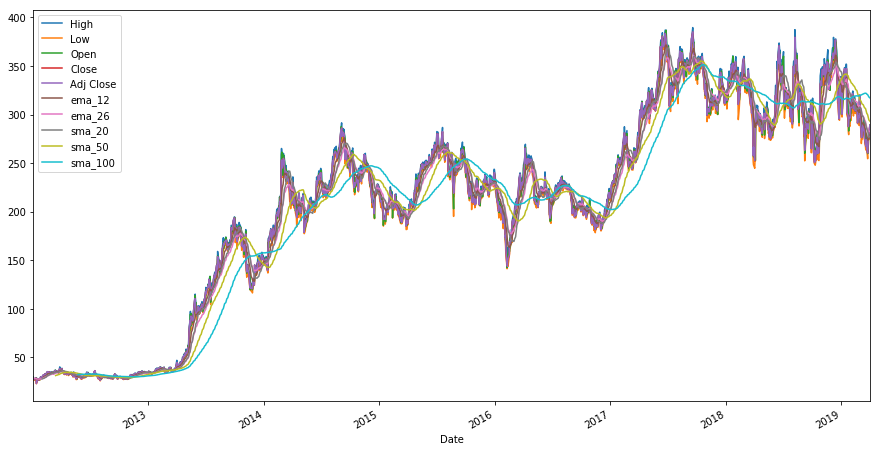

In [7]:
import statsmodels.api as sm

dataset.drop(['Volume', 'Gain'],axis=1).plot(figsize=(15,8))
plt.show()

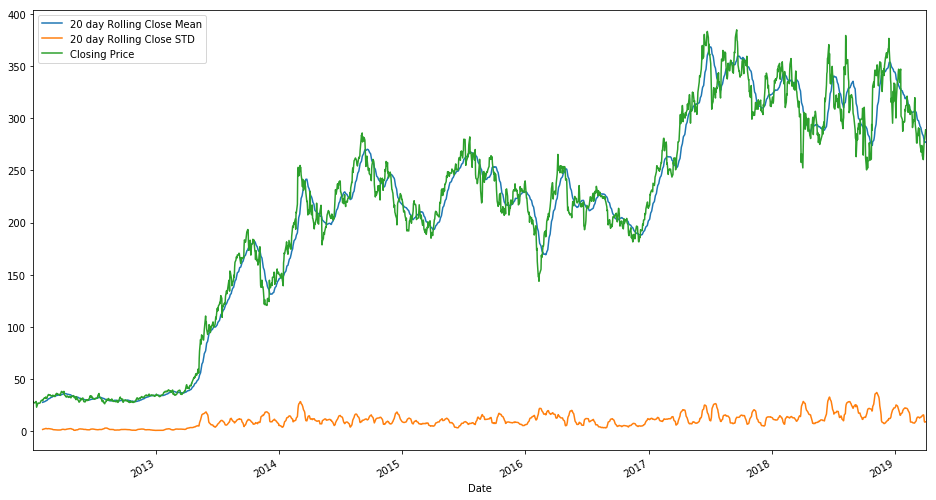

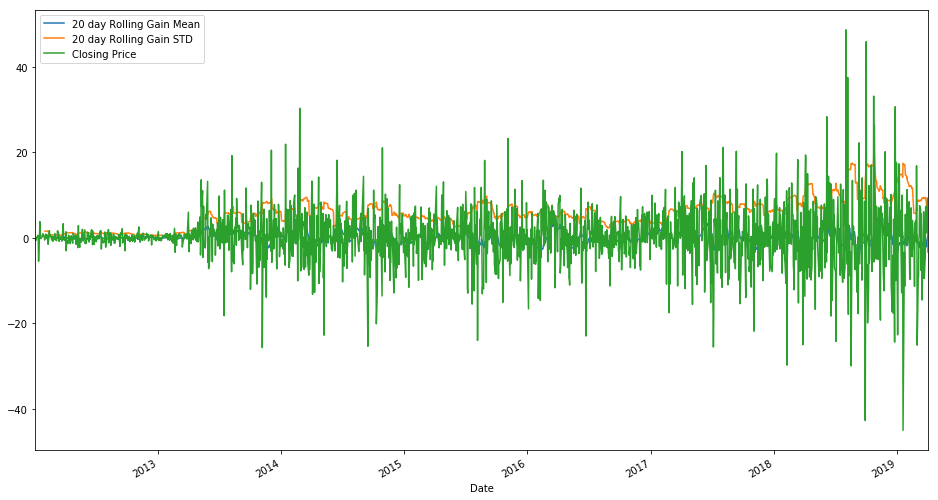

In [8]:
fig, ax = plt.subplots(figsize=(16,9))

#adf check and ARIMA model implementation are directly from source.
#https://www.udemy.com/python-for-finance-and-trading-algorithms/
    
time_series=dataset['Close']
time_series.rolling(20).mean().plot(label='20 day Rolling Close Mean')
time_series.rolling(20).std().plot(label='20 day Rolling Close STD')
time_series.plot(label="Closing Price")
plt.legend()
plt.show()


fig, ax = plt.subplots(figsize=(16,9))
time_series=dataset['Gain']
time_series.rolling(20).mean().plot(label='20 day Rolling Gain Mean')
time_series.rolling(20).std().plot(label='20 day Rolling Gain STD')
time_series.plot(label="Closing Price")
plt.legend()
plt.show()

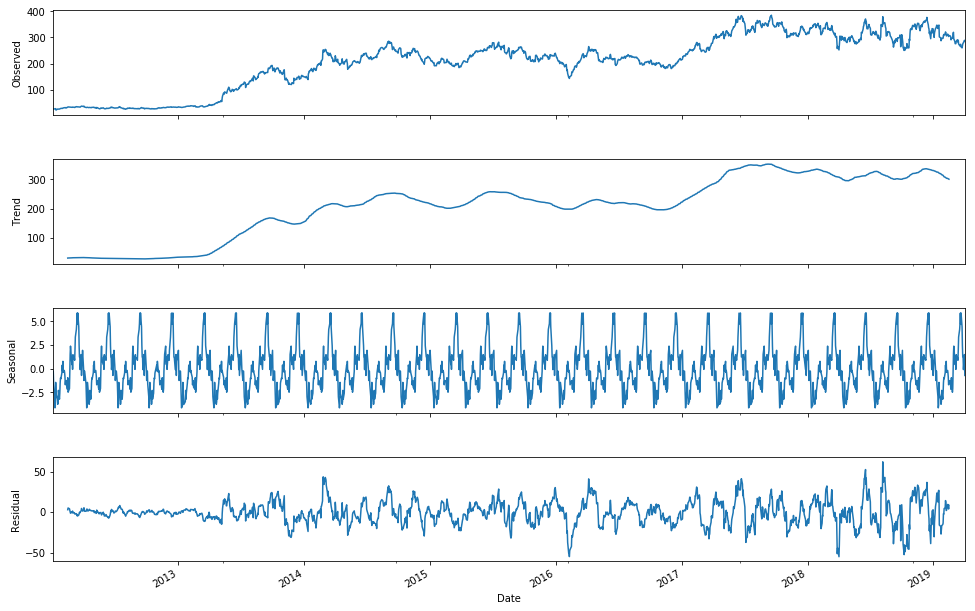

In [9]:
### Error trend and seasonality decomposition - ETSD
#linear or exponential trend
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose
time_series=dataset['Close']
decomp_add_63 = seasonal_decompose(time_series, freq = 63, model='additive')
decomp_add_21 = seasonal_decompose(time_series, freq = 21, model='additive')

fig = decomp_add_63.plot()
fig.set_size_inches(15,10)
plt.show()


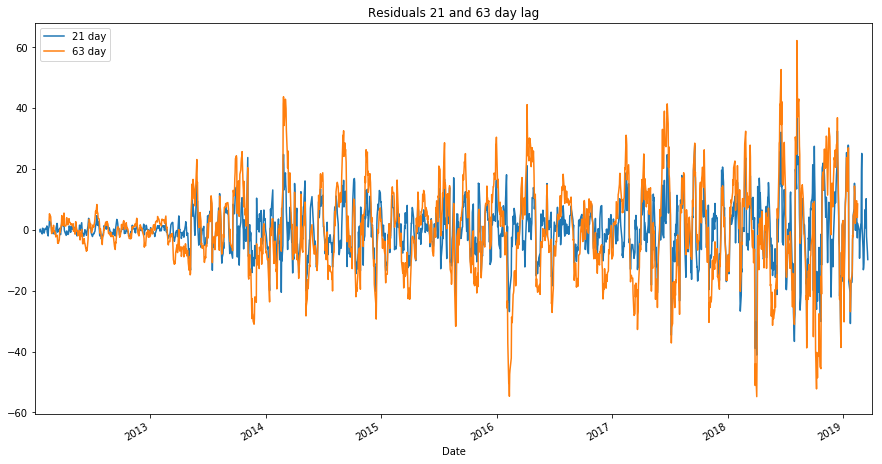

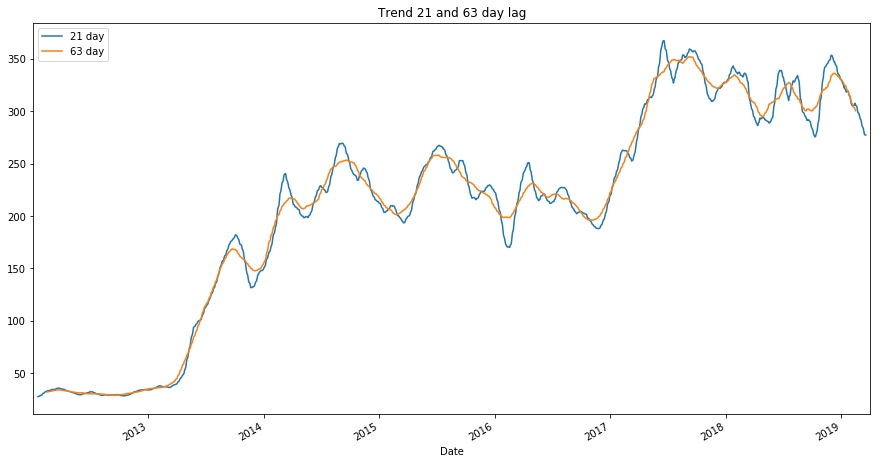

In [10]:
decomp_add_21.resid.plot(figsize=(15,8), title = "Residuals 21 and 63 day lag", label='21 day')
decomp_add_63.resid.plot( label='63 day')
plt.legend()
plt.show()
decomp_add_21.trend.plot(figsize=(15,8), label='21 day')
decomp_add_63.trend.plot(title='Trend 21 and 63 day lag', label='63 day')
plt.legend()
plt.show()


In [11]:
###Augmented Dicky Fuller Test - Test for seasonality
#null hypothesis : Data has unit root and is non-stationary
#p-value less than 0.05 will result in rejection of null hypothesis

from statsmodels.tsa.stattools import adfuller

result=adfuller(dataset['Close'])


def adf_check(time_series):
#Function zips results with appropriate labels for the tupple, and display on screen    
    
    result= adfuller(time_series)
    print(" Augmented Dicky-Fuller Test")
    labels = ['ADF Test Statistic', 'p-value', '# of lags', 'Num of Observations used']
    
    for value, label in zip(result, labels):
        print(label+' : ' + str(value))
    
   
    #p-value results evaluation
    if result[1] <= 0.05:
        print("Strong evidence against null hypothesis")
        print('reject null hypothesis')
        print('Data has no unit root and is stationary')
        print("")
    else:
        print("Weak evidence against null hypothesis")
        print('fail to reject null hypothesis')
        print('Data has unit root and is non-stationary')
        print("")
    

Evaluation of seasonality with 1 week interval reveals a very small p-value indicating we can reject the null hypothesis, and understand the data to be stationary with no unit root.

 Augmented Dicky-Fuller Test
ADF Test Statistic : -8.51405412969694
p-value : 1.1467454049319404e-13
# of lags : 25
Num of Observations used : 1790
Strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary

 Augmented Dicky-Fuller Test
ADF Test Statistic : -6.199060845581121
p-value : 5.867639628873926e-08
# of lags : 25
Num of Observations used : 1776
Strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary



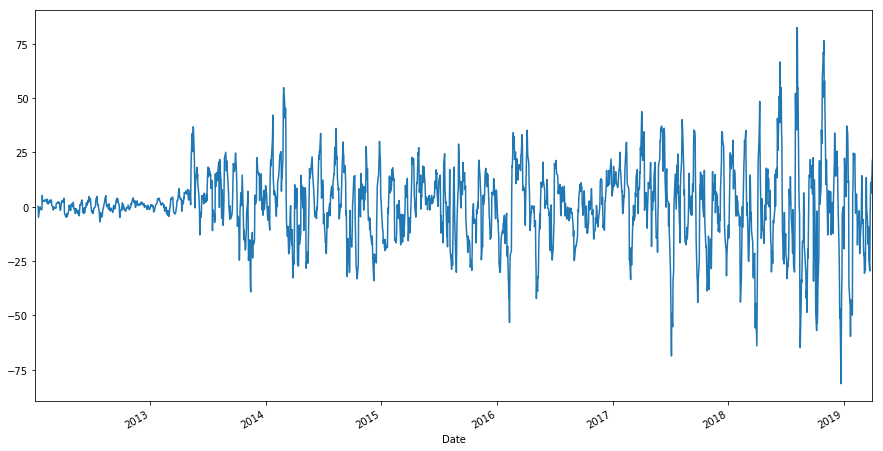

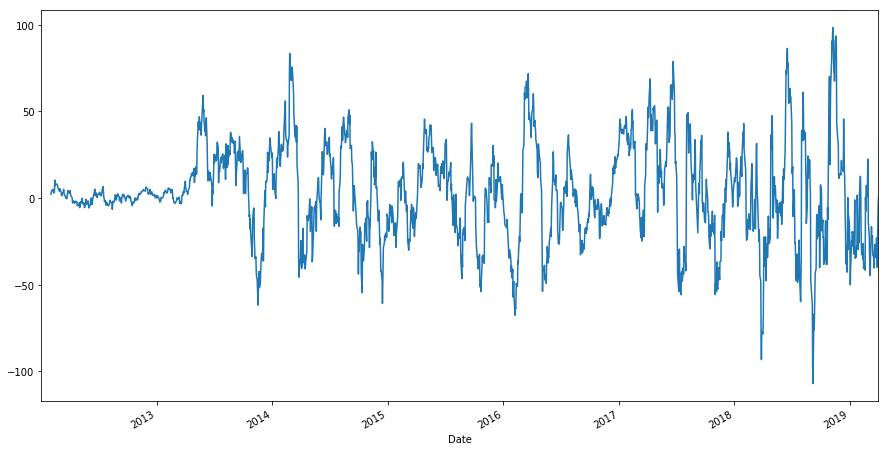

In [12]:
#Evaluate seasonality with Augmented Dicky-Fuller Test against the difference in weekly measurements
#dataset.drop(['Monthly Difference'], axis=1, inplace=True)

dataset['Weekly Difference'] = dataset['Close'] - dataset['Close'].shift(7)
adf_check(dataset['Weekly Difference'].dropna())

fig = dataset['Weekly Difference'].plot(figsize=(15,8))
dataset['Quarterly Difference'] = dataset['Close'] - dataset['Close'].shift(21)
adf_check(dataset['Quarterly Difference'].dropna())
plt.show()
fig = dataset['Quarterly Difference'].plot(figsize=(15,8))
plt.show()

In [13]:
from statsmodels.tsa.arima_model import ARIMA
#ARIMA
#p - # of lag observations
#d - # of times raw observations are differenced
#q - Size of the moving average

#Seasonal P,D,Q
ARIMA
model = sm.tsa.statespace.SARIMAX(dataset[:-300]['Close'], order = (0,1,1), seasonal_order=(1,1,1,21))



In [14]:
results = model.fit()

In [15]:
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              Close   No. Observations:                 1523
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 21)   Log Likelihood               -4702.177
Date:                            Fri, 05 Apr 2019   AIC                           9412.354
Time:                                    22:40:57   BIC                           9433.668
Sample:                                01-03-2012   HQIC                          9420.288
                                     - 01-22-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0330      0.022      1.509      0.131      -0.010       0.076
ar.S.L21      -0.0206      0.022   

            Prediction
Date                  
2013-06-11  100.258500
2013-06-12   94.805080
2013-06-13   97.563827
2013-06-14   98.498052
2013-06-17  100.639405
                  High         Low        Open       Close   Volume  \
2019-03-29  280.160004  274.500000  278.700012  279.859985  5991300   
2019-04-01  289.200012  281.279999  282.619995  289.179993  8110400   
2019-04-02  289.440002  283.880005  288.299988  285.880005  5478900   
2019-04-03         NaN         NaN         NaN         NaN      NaN   
2019-04-04         NaN         NaN         NaN         NaN      NaN   

             Adj Close      Gain      ema_12      ema_26      sma_20  \
2019-03-29  279.859985  1.239990  275.386336  282.365746  276.905496   
2019-04-01  289.179993  9.320007  277.508437  282.870505  277.096497   
2019-04-02  285.880005 -3.299988  278.796370  283.093431  277.563496   
2019-04-03         NaN       NaN         NaN         NaN         NaN   
2019-04-04         NaN       NaN         NaN        

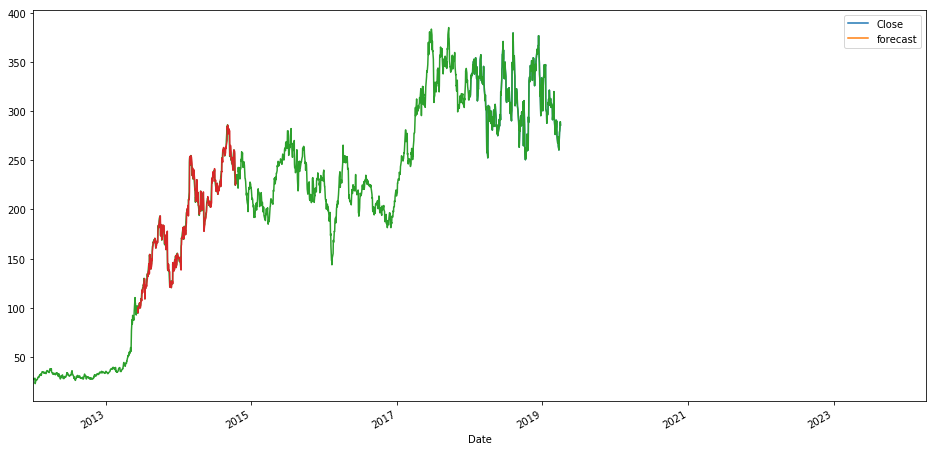

In [20]:
# dataset['forecast'] = 
#print(results.predict(start=1400, end=1822).head())

start = len(dataset) - 360  
end = len(dataset) + 12

future_dates = [dataset.index[-1] + DateOffset(days=x) for x in range(1,end)]
future_df = pd.DataFrame(index=future_dates, columns=dataset.columns)

# print(future_df.head())
test = results.predict(start=360, end=700)
test = pd.DataFrame(test, columns = ['Prediction'])
print(test.head())
# print(len(future_df['forecast'] ))
# future_df['forecast'] = test.values
# len(future_df)
# future_df.dropna(how='all', inplace=True)
# len(future_df)
# plt.show()

# print(min(test[:1].index))
# print(max(test[:-1]))

# final_df = pd.merge(dataset, test, on=index)

final_df = pd.concat([dataset, future_df])
#final_df[min(test[:1].index):min(test[:-1].index)]['forecast'] = test.values

final_df.loc['2018':'2019',['Close', 'forecast']].plot(figsize=(18,6));


final_df['Close'].plot(figsize=(16,8))
test['Prediction'].plot()

In [ ]:
dataset.tail()

In [ ]:
dataset.drop('forecast', axis=1)

In [ ]:
future_dates = [dataset.index[-1] + DateOffset(days=x) for x in range(1,365)]
future_dates

In [ ]:
future_df = pd.DataFrame(index=future_dates, columns=dataset.columns)
future_df.tail()

In [ ]:
start = len(dataset) - 1  
end = len(dataset) + len(future_df) - 2

print(start)
future_df['forecast'] = results.predict(start=start, end=end).values
plt.show()
future_df.head()

In [ ]:
final_df = pd.concat([dataset, future_df])
final_df.tail()

In [ ]:
final_df.loc['2018':'2019',['Close', 'forecast']].plot(figsize=(18,6));